In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [28]:
df = pd.read_csv('dataframe_.csv')
df.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


## Exploratory Data Analysis

In [29]:
df.shape

(1697, 2)

In [30]:
df.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


In [31]:
df.isna().sum()

input     1
output    1
dtype: int64

Null values exist, which can be removed using dropna

In [32]:
df.dtypes

input     float64
output    float64
dtype: object

In [33]:
df = df.dropna()

In [34]:
df.shape

(1696, 2)

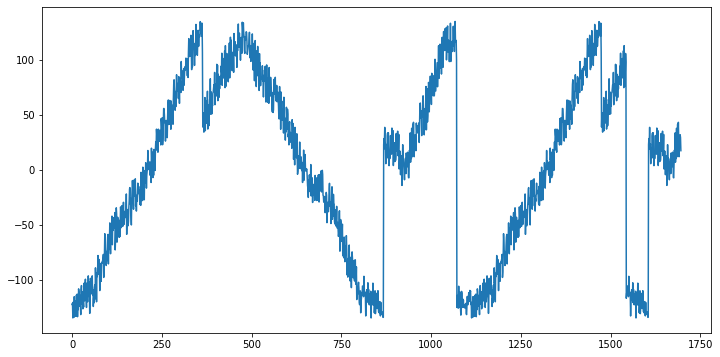

In [35]:
plt.figure(figsize = (12,6))
plt.plot(df['input'])

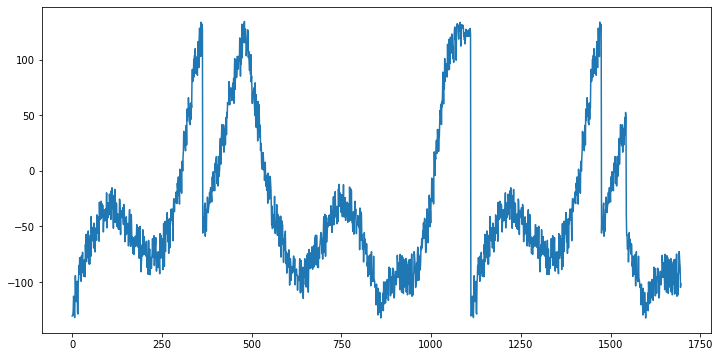

In [36]:
plt.figure(figsize = (12, 6))
plt.plot(df['output'])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='input'>

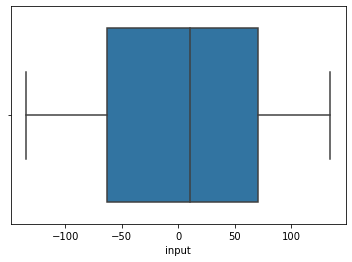

In [17]:
sns.boxplot(df['input'])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='output'>

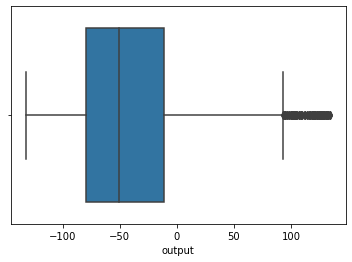

In [18]:
sns.boxplot(df['output'])

No outliers are present in input, Output values after 100 maybe ignored

<AxesSubplot:>

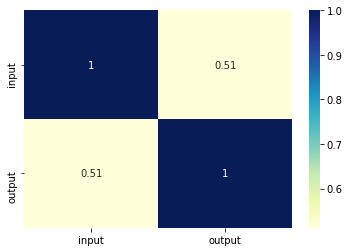

In [19]:
sns.heatmap(df.corr(), cmap = 'YlGnBu', annot = True)

Correlation of 0.51 between input and output

<AxesSubplot:xlabel='input', ylabel='output'>

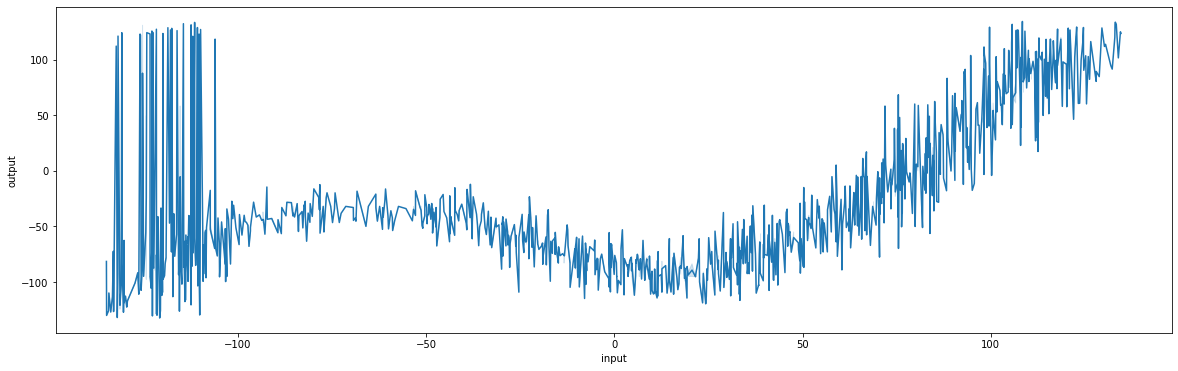

In [22]:
plt.figure(figsize = (20, 6))
sns.lineplot(x = 'input', y = 'output', data = df)

The relation between input and output can be visualized as shown above

## Feature Engineering

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [37]:
x = df['input']
y = df['output']

In [44]:
x

0      -122.740667
1      -121.531419
2      -134.917019
3      -120.605951
4      -129.894781
           ...    
1692     25.410184
1693     29.537304
1694     31.633331
1695     29.091458
1696     17.145296
Name: input, Length: 1696, dtype: float64

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)

In [40]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

1187
509
1187
509


In [47]:
x_train = x_train.to_numpy(dtype = 'float64')

In [48]:
x_test = x_test.to_numpy(dtype = 'float64')

In [50]:
x_train = x_train.reshape(-1, 1)

In [51]:
x_test = x_test.reshape(-1, 1)

## Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [53]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [54]:
print("Training Score:\n",reg.score(x_train,y_train)*100)

Training Score:
 25.873170450613813


In [61]:
import math
math.sqrt(mean_squared_error(y_test, y_pred))

56.72423101557923

In [55]:
y_pred = reg.predict(x_test)

In [56]:
print("Testing Score:\n",reg.score(x_test,y_test)*100)

Testing Score:
 26.906620980004824


## XGB Regressor

In [57]:
from xgboost import XGBRegressor
xg = XGBRegressor()
xg.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [58]:
print("Training Score:\n",xg.score(x_train,y_train)*100)

Training Score:
 94.74093566788883


In [62]:
y_pred_xgb = xg.predict(x_test)

In [64]:
print("Testing Score:\n",xg.score(x_test,y_test)*100)

Testing Score:
 64.0715314535959


In [66]:
math.sqrt(mean_squared_error(y_test, y_pred_xgb))

39.76939189314073

## ElasticNet Regression

In [67]:
from sklearn.linear_model import ElasticNet
ela = ElasticNet()
ela.fit(x_train, y_train)

ElasticNet()

In [68]:
print("Training Score:\n",ela.score(x_train,y_train)*100)
print("Testing Score:\n",ela.score(x_test,y_test)*100)

Training Score:
 25.87316855482382
Testing Score:
 26.906230074826098


## Bayesian Ridge Regression

In [69]:
from sklearn.linear_model import BayesianRidge
bsr = BayesianRidge()
bsr.fit(x_train, y_train)

BayesianRidge()

In [70]:
print("Training Score:\n",bsr.score(x_train,y_train)*100)
print("Testing Score:\n",bsr.score(x_test,y_test)*100)

Training Score:
 25.8730194704354
Testing Score:
 26.903000522359488


## SV Regression

In [71]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train, y_train)

SVR()

In [72]:
print("Training Score:\n",svr.score(x_train,y_train)*100)
print("Testing Score:\n",svr.score(x_test,y_test)*100)

Training Score:
 64.84397689574651
Testing Score:
 64.42514448740762


## Gradient Boosting Regression

In [75]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

GradientBoostingRegressor()

In [76]:
print("Training Score:\n",gbr.score(x_train,y_train)*100)
print("Testing Score:\n",gbr.score(x_test,y_test)*100)

Training Score:
 84.32462069776042
Testing Score:
 69.81471835085856


So XGB Regressor provides the best training accuracy of 94.7%, but lower testing accuracy of 64%.
Gradient Boosting Regression provides best testing accuracy of nearly 70%.

## Artificial Neural Network

In [79]:
from keras.models import Sequential
from keras.layers import Dense
 

model = Sequential()
 

model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
 

model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
 

model.add(Dense(1, kernel_initializer='normal'))
 

model.compile(loss='mean_squared_error', optimizer='adam')
 

model.fit(x_train, y_train ,batch_size = 20, epochs = 50, verbose=1)

Epoch 1/50
60/60 [==============================] - 29s 2ms/step - loss: 5479.6808
Epoch 2/50
60/60 [==============================] - 0s 794us/step - loss: 5328.4022
Epoch 3/50
60/60 [==============================] - 0s 1ms/step - loss: 5428.7345
Epoch 4/50
60/60 [==============================] - 0s 2ms/step - loss: 5186.4893
Epoch 5/50
60/60 [==============================] - 0s 1ms/step - loss: 5199.0982
Epoch 6/50
60/60 [==============================] - 0s 1ms/step - loss: 5256.1374
Epoch 7/50
60/60 [==============================] - 0s 995us/step - loss: 5548.4876
Epoch 8/50
60/60 [==============================] - 0s 1ms/step - loss: 5175.2935
Epoch 9/50
60/60 [==============================] - 0s 1ms/step - loss: 5227.0330
Epoch 10/50
60/60 [==============================] - 0s 2ms/step - loss: 5235.2074
Epoch 11/50
60/60 [==============================] - 0s 2ms/step - loss: 5068.6165
Epoch 12/50
60/60 [==============================] - 0s 1ms/step - loss: 4930.6248
Epoch 13

## Checking for performance imrovement after Scaling values

In [80]:
x_train = scaler.fit_transform(x_train)

In [81]:
x_test = scaler.fit_transform(x_test)

In [85]:
y_train1 = y_train.to_numpy(dtype = 'float64')

In [86]:
y_test1 = y_test.to_numpy(dtype = 'float64')

In [87]:
y_test1 = y_test1.reshape(-1, 1)

In [88]:
y_train1 = y_train1.reshape(-1, 1)

In [89]:
y_train1 = scaler.fit_transform(y_train1)

In [90]:
y_test1 = scaler.fit_transform(y_test1)

In [93]:
xgb = XGBRegressor()
xgb.fit(x_train, y_train1)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [94]:
print("Training Score:\n",xgb.score(x_train,y_train1)*100)
print("Testing Score:\n",xgb.score(x_test,y_test1)*100)

Training Score:
 94.68946386133513
Testing Score:
 57.69103286748249


In [95]:
model = Sequential()
 

model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
 

model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
 

model.add(Dense(1, kernel_initializer='normal'))
 

model.compile(loss='mean_squared_error', optimizer='adam')
 

model.fit(x_train, y_train1, batch_size = 20, epochs = 50, verbose=1)

Epoch 1/50
60/60 [==============================] - 1s 1ms/step - loss: 0.1947
Epoch 2/50
60/60 [==============================] - 0s 1ms/step - loss: 0.1052
Epoch 3/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0567
Epoch 4/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0555
Epoch 5/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0507
Epoch 6/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0523
Epoch 7/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0493
Epoch 8/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0524
Epoch 9/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0458
Epoch 10/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0458
Epoch 11/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0443
Epoch 12/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0484
Epoch 13/50
60/60 [==============================

In [97]:
y_predm = model.predict(x_test)

Loss for ANN improves a lot after scaled values are used

In [99]:
gbr1 = GradientBoostingRegressor()
gbr1.fit(x_train, y_train1)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

In [101]:
print("Training Score:\n",gbr1.score(x_train,y_train1)*100)
print("Testing Score:\n",gbr1.score(x_test,y_test1)*100)

Training Score:
 84.32462069776042
Testing Score:
 67.20703875293954


Even after scaling, any significant improvement in the erformance of other models is not observed.